In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt


# Exercise 1: Import raw California arrest data

In [2]:
# load in data
df = pd.read_csv(
    "https://media.githubusercontent.com/media/nickeubank/MIDS_Data/master/OnlineArrestData1980-2021.csv"
)  # read in the data
df.head(10)


,YEAR,GENDER,RACE,AGE_GROUP,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL
0,1980,Male,Black,Under 18,Alameda County,505,1351,188,26,79,2149,2286,295
1,1980,Male,Black,18 to 19,Alameda County,205,465,183,8,48,909,1333,0
2,1980,Male,Black,20 to 29,Alameda County,949,1593,606,27,178,3353,7974,0
3,1980,Male,Black,30 to 39,Alameda County,450,755,241,18,110,1574,4876,0
4,1980,Male,Black,40 to 69,Alameda County,172,218,117,11,66,584,3836,0
5,1980,Male,Black,70 and over,Alameda County,4,2,2,0,0,8,79,0
6,1980,Male,Hispanic,Under 18,Alameda County,151,365,40,9,77,642,1303,187
7,1980,Male,Hispanic,18 to 19,Alameda County,83,89,48,0,58,278,963,0
8,1980,Male,Hispanic,20 to 29,Alameda County,226,243,158,13,86,726,3748,0
9,1980,Male,Hispanic,30 to 39,Alameda County,59,80,41,8,33,221,1669,0


# Exercise 2: Unit of Observation

From the table, each row represent how many people have the relavant data values, for example, under F_drugoff (felony drug arrests), 188 black males under age 18 in Alameda County were arrested with this charge in 1980. 

# Exercise 3: Check for unique rows

In [3]:
df1 = df.duplicated(["YEAR", "GENDER", "RACE", "AGE_GROUP", "COUNTY"]).sum()
assert not df1.any()


# Exercise 4: Collapse data 

In [4]:
county_year_race = df.groupby(["YEAR", "RACE", "COUNTY"], as_index=False).sum()
county_year_race


/var/folders/n2/5x35hhp53jg1kc9jxswsqhww0000gn/T/ipykernel_90137/3573147655.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  county_year_race = df.groupby(["YEAR", "RACE", "COUNTY"], as_index=False).sum()


,YEAR,RACE,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL
0,1980,Black,Alameda County,2594,5138,1489,94,541,9856,24081,555
1,1980,Black,Butte County,32,33,5,0,7,77,139,0
2,1980,Black,Calaveras County,0,0,0,0,0,0,7,0
3,1980,Black,Colusa County,0,5,0,0,0,5,13,0
4,1980,Black,Contra Costa County,720,1422,368,24,257,2791,5201,40
...,...,...,...,...,...,...,...,...,...,...,...
9697,2021,White,Tulare County,524,407,195,10,413,1549,3368,31
9698,2021,White,Tuolumne County,182,63,35,13,289,582,1393,2
9699,2021,White,Ventura County,574,372,308,13,672,1939,7509,18
9700,2021,White,Yolo County,171,163,51,8,173,566,1051,0


In [5]:
ex4_num_rows = county_year_race.shape[0]
ex4_num_rows


9702

In [6]:
county_year_race[county_year_race["RACE"] == "White"]


,YEAR,RACE,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL
170,1980,White,Alameda County,1179,3103,1650,119,767,6818,34455,1358
171,1980,White,Alpine County,1,9,2,1,0,13,117,0
172,1980,White,Amador County,9,58,12,3,5,87,283,0
173,1980,White,Butte County,235,614,136,18,184,1187,3897,3
174,1980,White,Calaveras County,44,117,81,3,27,272,628,3
...,...,...,...,...,...,...,...,...,...,...,...
9697,2021,White,Tulare County,524,407,195,10,413,1549,3368,31
9698,2021,White,Tuolumne County,182,63,35,13,289,582,1393,2
9699,2021,White,Ventura County,574,372,308,13,672,1939,7509,18
9700,2021,White,Yolo County,171,163,51,8,173,566,1051,0


# Exercise 5: Identify collapsed variables

In [7]:
ex5_collapsed_vars = ["AGE_GROUP", "GENDER"]
ex5_collapsed_vars


['AGE_GROUP', 'GENDER']

# Exercise 6: Total drug and violent arrests

In [8]:
violent_year = county_year_race.groupby(["COUNTY", "YEAR"])["VIOLENT"].transform("sum")
drug_year = county_year_race.groupby(["COUNTY", "YEAR"])["F_DRUGOFF"].transform("sum")
county_year_race["total_violent_by_race"] = violent_year
county_year_race["total_drug_by_race"] = drug_year
county_year_race


,YEAR,RACE,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_violent_by_race,total_drug_by_race
0,1980,Black,Alameda County,2594,5138,1489,94,541,9856,24081,555,4504,3569
1,1980,Black,Butte County,32,33,5,0,7,77,139,0,306,149
2,1980,Black,Calaveras County,0,0,0,0,0,0,7,0,52,83
3,1980,Black,Colusa County,0,5,0,0,0,5,13,0,28,9
4,1980,Black,Contra Costa County,720,1422,368,24,257,2791,5201,40,1596,1089
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9697,2021,White,Tulare County,524,407,195,10,413,1549,3368,31,2360,635
9698,2021,White,Tuolumne County,182,63,35,13,289,582,1393,2,229,44
9699,2021,White,Ventura County,574,372,308,13,672,1939,7509,18,1845,752
9700,2021,White,Yolo County,171,163,51,8,173,566,1051,0,480,92


# Exercise 7: Share of violent and drug arrestees for each racial group

In [9]:
# test: county_year_race[(county_year_race["COUNTY"] == "Alameda County") & (county_year_race["YEAR"] == 1980)]
ala = county_year_race.iloc[0]
ex7_alameda_1980_share_violent_arrestees_black = (
    ala["VIOLENT"] / ala["total_violent_by_race"]
) * 100
ex7_alameda_1980_share_violent_arrestees_black
# do we need to add a column with share of arrest rates


57.59325044404974

In [10]:
# added columns for share of violent and drug-related arrests by race
county_year_race["share_violent_by_race"] = (
    county_year_race["VIOLENT"] / county_year_race["total_violent_by_race"]
)
county_year_race["share_drug_by_race"] = (
    county_year_race["F_DRUGOFF"] / county_year_race["total_drug_by_race"]
)
county_year_race

# value between 0-1
ex7_alameda_1980_share_violent_arrestees_black = county_year_race[
    (county_year_race["YEAR"] == 1980)
    & (county_year_race["RACE"] == "Black")
    & (county_year_race["COUNTY"] == "Alameda County")
]["share_violent_by_race"][0]
ex7_alameda_1980_share_violent_arrestees_black


0.5759325044404974

# Exercise 8: Double-check features after data manipulation

In [11]:
# check share of violent arrests fall between 0 and 1
assert county_year_race["share_violent_by_race"].all() >= 0
assert county_year_race["share_violent_by_race"].all() < 1


In [12]:
# Q2-1: check unique counties with data for black arrestees
county_year_black = county_year_race[county_year_race["RACE"] == "Black"]
county_year_black = county_year_black[county_year_black["F_TOTAL"] > 0]
assert county_year_black.nunique().loc["COUNTY"] == 58


In [13]:
# Q2-2: check unique counties with data for white arrestees
county_year_white = county_year_race[county_year_race["RACE"] == "White"]
county_year_white = county_year_white[county_year_white["F_TOTAL"] > 0]
assert county_year_white.nunique().loc["COUNTY"] == 58


In [14]:
# checks:
share1 = county_year_race["share_violent_by_race"] * 100
share2 = county_year_race["share_drug_by_race"] * 100
print(share2 / share1)


0       0.724397
1       0.320889
2            NaN
3            NaN
4       0.749066
          ...   
9697    1.383062
9698    1.000874
9699    1.316489
9700    1.556064
9701    1.002492
Length: 9702, dtype: float64


# Exercise 9: Check counties per year and racial group

In [15]:
black1 = (
    county_year_race[(county_year_race["RACE"] == "Black")]
    .groupby("COUNTY")
    .count()
    .sort_values(by="YEAR", ascending=True)
    .head(10)
)
black1


,YEAR,RACE,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_violent_by_race,total_drug_by_race,share_violent_by_race,share_drug_by_race
COUNTY,,,,,,,,,,,,,,
Alpine County,30,30,30,30,30,30,30,30,30,30,30,30,30,28
Sierra County,31,31,31,31,31,31,31,31,31,31,31,31,31,31
Modoc County,38,38,38,38,38,38,38,38,38,38,38,38,38,38
Trinity County,38,38,38,38,38,38,38,38,38,38,38,38,38,38
Amador County,41,41,41,41,41,41,41,41,41,41,41,41,41,41
Mono County,41,41,41,41,41,41,41,41,41,41,41,41,41,41
Mariposa County,41,41,41,41,41,41,41,41,41,41,41,41,41,41
San Luis Obispo County,42,42,42,42,42,42,42,42,42,42,42,42,42,42
San Joaquin County,42,42,42,42,42,42,42,42,42,42,42,42,42,42


In [16]:
black2 = (
    county_year_race[(county_year_race["RACE"] == "Black")]
    .groupby("COUNTY")
    .count()
    .YEAR
)
black2.value_counts()


42    51
41     3
38     2
30     1
31     1
Name: YEAR, dtype: int64

In [17]:
white1 = (
    county_year_race[(county_year_race["RACE"] == "White")]
    .groupby("COUNTY")
    .count()
    .sort_values(by="YEAR", ascending=True)
    .head(10)
)


In [18]:
white2 = (
    county_year_race[(county_year_race["RACE"] == "White")]
    .groupby("COUNTY")
    .count()
    .YEAR
)
white2.value_counts()


42    58
Name: YEAR, dtype: int64

In [19]:
Other1 = (
    county_year_race[(county_year_race["RACE"] == "Other")]
    .groupby("COUNTY")
    .count()
    .sort_values(by="YEAR", ascending=True)
    .head(5)
)
Other1


,YEAR,RACE,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_violent_by_race,total_drug_by_race,share_violent_by_race,share_drug_by_race
COUNTY,,,,,,,,,,,,,,
Sierra County,40,40,40,40,40,40,40,40,40,40,40,40,40,40
Alameda County,42,42,42,42,42,42,42,42,42,42,42,42,42,42
Plumas County,42,42,42,42,42,42,42,42,42,42,42,42,42,42
Riverside County,42,42,42,42,42,42,42,42,42,42,42,42,42,42
Sacramento County,42,42,42,42,42,42,42,42,42,42,42,42,42,42


In [20]:
Other2 = (
    county_year_race[(county_year_race["RACE"] == "Other")]
    .groupby("COUNTY")
    .count()
    .YEAR
)
Other2.value_counts()


42    57
40     1
Name: YEAR, dtype: int64

In [21]:
Hispanic1 = (
    county_year_race[(county_year_race["RACE"] == "Hispanic")]
    .groupby("COUNTY")
    .count()
    .sort_values(by="YEAR", ascending=True)
    .head(5)
)


In [22]:
Hispanic2 = (
    county_year_race[(county_year_race["RACE"] == "Hispanic")]
    .groupby("COUNTY")
    .count()
    .YEAR
)
Hispanic2.value_counts()


42    57
36     1
Name: YEAR, dtype: int64

There is data missing pertaining to Black arrestees from the following counties: Alpine County, Sierra County, Modoc County, Trinity County, Amador County, Mono County and Mariposa County. Upon further inspection, African Americans make up less than 2% of each of these counties (according to Census population data); with such a small sample there probably aren't any Black arrestees from those counties on those years. The same goes for Hispanic and Other races, they are underrepresented in the counties therefore there is limited data regardign them. However, there is data present across all counties and years for White arrestees since they make up the majority of each county in terms of population. 

# Exercise 10: Fix the case of missing counties

In [53]:
county_year_race[
    (county_year_race["COUNTY"] == "Alpine County")
    & (county_year_race["RACE"] == "Black")
].head()


,YEAR,RACE,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_violent_by_race,total_drug_by_race,share_violent_by_race,share_drug_by_race
916,1984,Black,Alpine County,0,1,0,0,0,1,0,0,1,1,0.0,0.00
2062,1989,Black,Alpine County,1,0,0,0,0,1,1,0,5,4,0.2,0.00
2755,1992,Black,Alpine County,0,0,1,0,1,2,0,0,11,4,0.0,0.25
2986,1993,Black,Alpine County,0,0,0,0,0,0,1,0,3,7,0.0,0.00
3217,1994,Black,Alpine County,0,0,0,0,0,0,1,0,9,3,0.0,0.00


In [63]:
# fill in the value for Alpine county that some races don't have equal to zero and keep all rows in different counties are the same
county_year_race.loc[len(county_year_race)] = [1980,'Black','Alpine County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [1981,'Black','Alpine County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [1982,'Black','Alpine County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [1983,'Black','Alpine County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [1985,'Black','Alpine County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [1986,'Black','Alpine County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [1987,'Black','Alpine County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [1988,'Black','Alpine County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [1990,'Black','Alpine County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [1991,'Black','Alpine County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [1997,'Black','Alpine County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [2001,'Black','Alpine County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.shape

(9768, 15)

In [62]:
#replace above cell with this
alpine_year = [1980, 1981, 1982, 1983, 1985, 1986, 1987, 1988, 1990, 1991, 1997, 2001]
alpine_data = pd.DataFrame(columns=county_year_race.columns)
alpine_data.YEAR = alpine_year
alpine_data.RACE = 'Black'
alpine_data.COUNTY = 'Alpine County'
alpine_data = alpine_data.fillna(0)
county_year_race = pd.concat([county_year_race, alpine_data])
county_year_race.shape

AttributeError: 'DataFrame' object has no attribute 'concat'

In [26]:
county_year_race[
    (county_year_race["COUNTY"] == "Alpine County")
    & (county_year_race["RACE"] == "Black")
].sort_values(by="YEAR", ascending=True).head(5)


,YEAR,RACE,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_violent_by_race,total_drug_by_race,share_violent_by_race,share_drug_by_race
9702,1980,Black,Alpine County,0,0,0,0,0,0,0,0,0,0,0.0,0.0
9703,1981,Black,Alpine County,0,0,0,0,0,0,0,0,0,0,0.0,0.0
9704,1982,Black,Alpine County,0,0,0,0,0,0,0,0,0,0,0.0,0.0
9705,1983,Black,Alpine County,0,0,0,0,0,0,0,0,0,0,0.0,0.0
916,1984,Black,Alpine County,0,1,0,0,0,1,0,0,1,1,0.0,0.0


In [27]:
county_year_race[
    (county_year_race["COUNTY"] == "Sierra County")
    & (county_year_race["RACE"] == "Black")
].head()


,YEAR,RACE,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_violent_by_race,total_drug_by_race,share_violent_by_race,share_drug_by_race
728,1983,Black,Sierra County,1,1,0,0,0,2,0,0,10,15,0.10,0.00
1187,1985,Black,Sierra County,0,2,1,0,0,3,5,0,17,25,0.00,0.04
1416,1986,Black,Sierra County,0,0,0,0,0,0,0,0,8,15,0.00,0.00
1644,1987,Black,Sierra County,1,0,0,0,0,1,2,0,20,20,0.05,0.00
1874,1988,Black,Sierra County,0,0,0,0,0,0,2,0,13,16,0.00,0.00


In [28]:
# fill in the value for Sierra county that some races don't have equal to zero and keep all rows in different counties are the same
county_year_race.loc[len(county_year_race)] = [1980,'Black','Sierra County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [1981,'Black','Sierra County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [1982,'Black','Sierra County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [1984,'Black','Sierra County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [1990,'Black','Sierra County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [1992,'Black','Sierra County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [1993,'Black','Sierra County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [1996,'Black','Sierra County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [2011,'Black','Sierra County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [2012,'Black','Sierra County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [2014,'Black','Sierra County',0,0,0,0,0,0,0,0,0,0,0,0]


In [ ]:
#replace above cell with this
sierra_year = [1980, 1981, 1982, 1984, 1990, 1992, 1993, 1996, 2011, 2012, 2014]
sierra_data = pd.DataFrame(columns=county_year_race.columns)
sierra_data.YEAR = sierra_year
sierra_data.RACE = 'Black'
sierra_data.COUNTY = 'Sierra County'
sierra_data = sierra_data.fillna(0)
county_year_race = pd.concat([county_year_race, sierra_data])
county_year_race.shape

In [29]:
county_year_race[
    (county_year_race["COUNTY"] == "Sierra County")
    & (county_year_race["RACE"] == "Black")
].sort_values(by="YEAR", ascending=True).head(5)


,YEAR,RACE,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_violent_by_race,total_drug_by_race,share_violent_by_race,share_drug_by_race
9714,1980,Black,Sierra County,0,0,0,0,0,0,0,0,0,0,0.0,0.0
9715,1981,Black,Sierra County,0,0,0,0,0,0,0,0,0,0,0.0,0.0
9716,1982,Black,Sierra County,0,0,0,0,0,0,0,0,0,0,0.0,0.0
728,1983,Black,Sierra County,1,1,0,0,0,2,0,0,10,15,0.1,0.0
9717,1984,Black,Sierra County,0,0,0,0,0,0,0,0,0,0,0.0,0.0


In [30]:
county_year_race[
    (county_year_race["COUNTY"] == "Modoc County")
    & (county_year_race["RACE"] == "Black")
].head()


,YEAR,RACE,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_violent_by_race,total_drug_by_race,share_violent_by_race,share_drug_by_race
22,1980,Black,Modoc County,0,1,0,0,0,1,1,0,18,5,0.0,0.0
251,1981,Black,Modoc County,0,2,0,0,0,2,1,0,20,5,0.0,0.0
707,1983,Black,Modoc County,0,1,0,0,0,1,0,0,19,17,0.0,0.0
938,1984,Black,Modoc County,0,0,0,0,0,0,5,0,25,27,0.0,0.0
1166,1985,Black,Modoc County,0,0,0,0,0,0,1,0,13,13,0.0,0.0


In [31]:
# fill in the value for Modoc county that some races don't have equal to zero and keep all rows in different counties are the same
county_year_race.loc[len(county_year_race)] = [1982,'Black','Modoc County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [1986,'Black','Modoc County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [1987,'Black','Modoc County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [2003,'Black','Modoc County',0,0,0,0,0,0,0,0,0,0,0,0]


In [ ]:
#replace above cell with this
modoc_year = [1982, 1986, 1987, 2003]
modoc_data = pd.DataFrame(columns=county_year_race.columns)
modoc_data.YEAR = modoc_year
modoc_data.RACE = 'Black'
modoc_data.COUNTY = 'Modoc County'
modoc_data = modoc_data.fillna(0)
county_year_race = pd.concat([county_year_race, modoc_data])
county_year_race.shape

In [32]:
county_year_race[
    (county_year_race["COUNTY"] == "Modoc County")
    & (county_year_race["RACE"] == "Black")
].sort_values(by="YEAR", ascending=True).head(5)


,YEAR,RACE,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_violent_by_race,total_drug_by_race,share_violent_by_race,share_drug_by_race
22,1980,Black,Modoc County,0,1,0,0,0,1,1,0,18,5,0.0,0.0
251,1981,Black,Modoc County,0,2,0,0,0,2,1,0,20,5,0.0,0.0
9725,1982,Black,Modoc County,0,0,0,0,0,0,0,0,0,0,0.0,0.0
707,1983,Black,Modoc County,0,1,0,0,0,1,0,0,19,17,0.0,0.0
938,1984,Black,Modoc County,0,0,0,0,0,0,5,0,25,27,0.0,0.0


In [33]:
county_year_race[
    (county_year_race["COUNTY"] == "Trinity County")
    & (county_year_race["RACE"] == "Black")
].head()


,YEAR,RACE,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_violent_by_race,total_drug_by_race,share_violent_by_race,share_drug_by_race
49,1980,Black,Trinity County,0,2,0,0,0,2,0,0,33,28,0.000000,0.000000
505,1982,Black,Trinity County,0,0,0,0,0,0,2,0,29,16,0.000000,0.000000
735,1983,Black,Trinity County,0,0,0,0,0,0,1,0,27,60,0.000000,0.000000
1194,1985,Black,Trinity County,2,0,0,0,0,2,0,0,21,45,0.095238,0.000000
1881,1988,Black,Trinity County,2,0,2,0,0,4,1,0,83,128,0.024096,0.015625


In [34]:
# fill in the value for Modoc county that some races don't have equal to zero and keep all rows in different counties are the same
county_year_race.loc[len(county_year_race)] = [1981,'Black','Trinity County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [1984,'Black','Trinity County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [1986,'Black','Trinity County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [1987,'Black','Trinity County',0,0,0,0,0,0,0,0,0,0,0,0]



In [ ]:
#replace above cell with this
trinity_year = [1981, 1984, 1986, 1987]
trinity_data = pd.DataFrame(columns=county_year_race.columns)
trinity_data.YEAR = trinity_year
trinity_data.RACE = 'Black'
trinity_data.COUNTY = 'Trinity County'
trinity_data = trinity_data.fillna(0)
county_year_race = pd.concat([county_year_race, trinity_data])
county_year_race.shape

In [35]:
county_year_race[
    (county_year_race["COUNTY"] == "Trinity County")
    & (county_year_race["RACE"] == "Black")
].sort_values(by="YEAR", ascending=True).head(5)


,YEAR,RACE,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_violent_by_race,total_drug_by_race,share_violent_by_race,share_drug_by_race
49,1980,Black,Trinity County,0,2,0,0,0,2,0,0,33,28,0.0,0.0
9729,1981,Black,Trinity County,0,0,0,0,0,0,0,0,0,0,0.0,0.0
505,1982,Black,Trinity County,0,0,0,0,0,0,2,0,29,16,0.0,0.0
735,1983,Black,Trinity County,0,0,0,0,0,0,1,0,27,60,0.0,0.0
9730,1984,Black,Trinity County,0,0,0,0,0,0,0,0,0,0,0.0,0.0


In [36]:
county_year_race[(county_year_race["COUNTY"] == "Amador County") & (county_year_race["RACE"] == "Black")]
# fill in the value for county that some races don't have equal to zero and keep all rows in different counties are the same
county_year_race.loc[len(county_year_race)] = [1980,'Black','Amador County',0,0,0,0,0,0,0,0,0,0,0,0]

In [37]:
county_year_race[(county_year_race["COUNTY"] == "Mono County") & (county_year_race["RACE"] == "Black")]
# fill in the value for county that some races don't have equal to zero and keep all rows in different counties are the same
county_year_race.loc[len(county_year_race)] = [1995,'Black','Mono County',0,0,0,0,0,0,0,0,0,0,0,0]

In [38]:
county_year_race[(county_year_race["COUNTY"] == "Mariposa County") & (county_year_race["RACE"] == "Black")]
# fill in the value for county that some races don't have equal to zero and keep all rows in different counties are the same
county_year_race.loc[len(county_year_race)] = [1984,'Black','Mariposa County',0,0,0,0,0,0,0,0,0,0,0,0]

In [39]:
Other1


,YEAR,RACE,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_violent_by_race,total_drug_by_race,share_violent_by_race,share_drug_by_race
COUNTY,,,,,,,,,,,,,,
Sierra County,40,40,40,40,40,40,40,40,40,40,40,40,40,40
Alameda County,42,42,42,42,42,42,42,42,42,42,42,42,42,42
Plumas County,42,42,42,42,42,42,42,42,42,42,42,42,42,42
Riverside County,42,42,42,42,42,42,42,42,42,42,42,42,42,42
Sacramento County,42,42,42,42,42,42,42,42,42,42,42,42,42,42


In [40]:
county_year_race[(county_year_race["COUNTY"] == "Sierra County") & (county_year_race["RACE"] == "Other")]
# fill in the value for county that some races don't have equal to zero and keep all rows in different counties are the same
county_year_race.loc[len(county_year_race)] = [2000,'Other','Sierra County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [2013,'Other','Sierra County',0,0,0,0,0,0,0,0,0,0,0,0]

In [41]:
Hispanic1


,YEAR,RACE,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_violent_by_race,total_drug_by_race,share_violent_by_race,share_drug_by_race
COUNTY,,,,,,,,,,,,,,
Alpine County,36,36,36,36,36,36,36,36,36,36,36,36,36,33
Alameda County,42,42,42,42,42,42,42,42,42,42,42,42,42,42
Plumas County,42,42,42,42,42,42,42,42,42,42,42,42,42,42
Riverside County,42,42,42,42,42,42,42,42,42,42,42,42,42,42
Sacramento County,42,42,42,42,42,42,42,42,42,42,42,42,42,42


In [42]:
county_year_race[(county_year_race["COUNTY"] == "Alpine County") & (county_year_race["RACE"] == "Hispanic")]
# fill in the value for county that some races don't have equal to zero and keep all rows in different counties are the same
county_year_race.loc[len(county_year_race)] = [1980,'Hispanic','Alpine County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [1981,'Hispanic','Alpine County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [1982,'Hispanic','Alpine County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [1984,'Hispanic','Alpine County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [1985,'Hispanic','Alpine County',0,0,0,0,0,0,0,0,0,0,0,0]
county_year_race.loc[len(county_year_race)] = [1986,'Hispanic','Alpine County',0,0,0,0,0,0,0,0,0,0,0,0]



In [ ]:
#replace above cell with this
hisp_alpine_year = [1980, 1981, 1982, 1984, 1985, 1986]
hisp_alpine_data = pd.DataFrame(columns=county_year_race.columns)
hisp_alpine_data.YEAR = hisp_alpine_year
hisp_alpine_data.RACE = 'Hispanic'
hisp_alpine_data.COUNTY = 'Alpine County'
hisp_alpine_data = hisp_alpine_data.fillna(0)
county_year_race = pd.concat([county_year_race, hisp_alpine_data])
county_year_race.shape

In [43]:
## check if all races have same rows in counties
print(
    county_year_race[(county_year_race["RACE"] == "Black")]
    .groupby("COUNTY")
    .count()
    .YEAR.value_counts()
)
print(
    county_year_race[(county_year_race["RACE"] == "Other")]
    .groupby("COUNTY")
    .count()
    .YEAR.value_counts()
)
print(
    county_year_race[(county_year_race["RACE"] == "Hispanic")]
    .groupby("COUNTY")
    .count()
    .YEAR.value_counts()
)


42    58
Name: YEAR, dtype: int64
42    58
Name: YEAR, dtype: int64
42    58
Name: YEAR, dtype: int64


# Exercise 11: Calculate average share of Black and White drug arrestees

In [44]:
county_year_race[(county_year_race["RACE"] == "White")].groupby(
    "COUNTY"
).count().YEAR.value_counts()


42    58
Name: YEAR, dtype: int64

In [45]:
white_drug = county_year_race[(county_year_race["RACE"] == "White")]
ex11_white_drug_share = (
    white_drug["F_DRUGOFF"].sum() / county_year_race["F_DRUGOFF"].sum()
)
print(f"Average share of Black drug arrestees: {ex11_white_drug_share:.2f}")


Average share of Black drug arrestees: 0.38


In [46]:
Black_drug = county_year_race[(county_year_race["RACE"] == "Black")]
ex11_black_drug_share = (
    Black_drug["F_DRUGOFF"].sum() / county_year_race["F_DRUGOFF"].sum()
)
print(f"Average share of White drug arrestees: {ex11_black_drug_share:.2f}")


Average share of White drug arrestees: 0.24


# Exercise 12: Plot violent arrests vs drug arrests

In [47]:
Black_felony = county_year_race[(county_year_race["RACE"] == "Black")]
Black_felony["VIOLENT"]
ex12_black_felony_share = (
    Black_felony["VIOLENT"].sum() / county_year_race["VIOLENT"].sum()
)
ex12_black_felony_share


0.25731636931707513

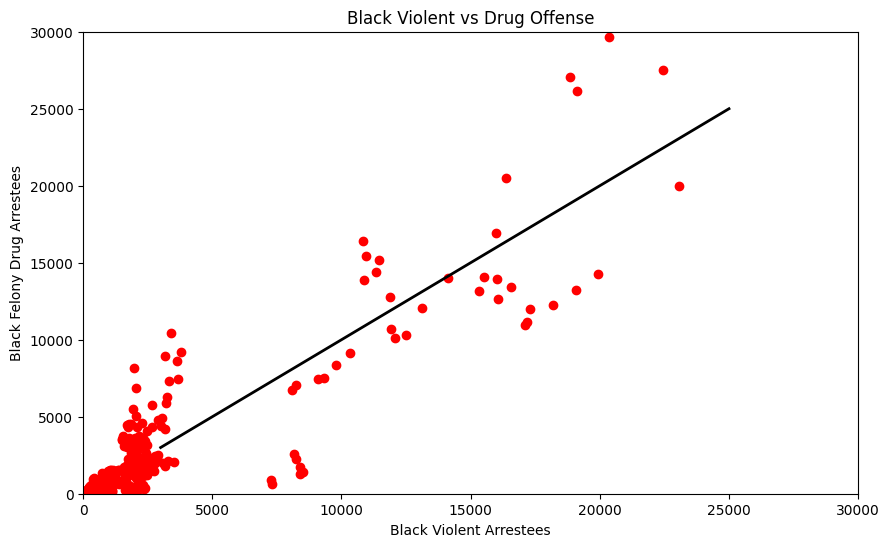

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(Black_drug["VIOLENT"], Black_drug["F_DRUGOFF"], color="red")
plt.plot([3000, 25000], [3000, 25000], color="black", linewidth=2)
plt.xlim(0, 30000)
plt.ylim(0, 30000)
plt.title("Black Violent vs Drug Offense")
plt.xlabel("Black Violent Arrestees")
plt.ylabel("Black Felony Drug Arrestees")
plt.show()


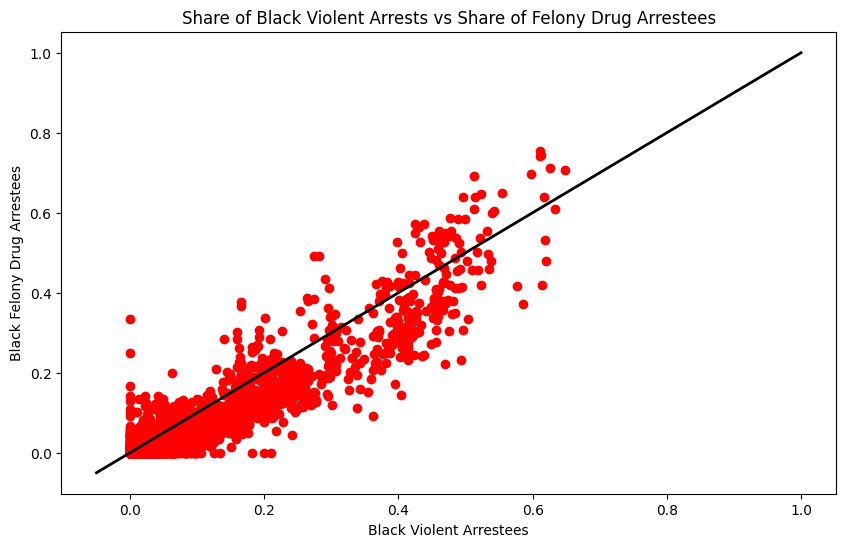

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(
    Black_drug["share_violent_by_race"], Black_drug["share_drug_by_race"], color="red"
)
plt.plot([-0.05, 1], [-0.05, 1], color="black", linewidth=2)
plt.title("Share of Black Violent Arrests vs Share of Felony Drug Arrestees")
plt.xlabel("Black Violent Arrestees")
plt.ylabel("Black Felony Drug Arrestees")
plt.show()


From the graph above, it shows that the felony drug arrestees and violent arrestees have positive relationship and look proportionate mostly. 

In [50]:
ratio = (Black_drug["share_violent_by_race"] / Black_drug["share_drug_by_race"]).fillna(0)
ex12_proportionate = "greater_violent"


From the results, I think the black arrestees make up a greater share of violent arrestees. 

In [51]:
results = {
    "ex4_num_rows": ex4_num_rows,
    "ex5_collapsed_vars": ex5_collapsed_vars,
    "ex7_alameda_1980_share_violent_arrestees_black": ex7_alameda_1980_share_violent_arrestees_black,
    "ex11_white_drug_share": ex11_white_drug_share,
    "ex11_black_drug_share": ex11_black_drug_share,
    "ex12_proportionate": ex12_proportionate,
}



In [52]:
assert set(results.keys()) == {
    "ex4_num_rows",
    "ex5_collapsed_vars",
    "ex7_alameda_1980_share_violent_arrestees_black",
    "ex11_white_drug_share",
    "ex11_black_drug_share",
    "ex12_proportionate",
}
